In [1]:
import sys
sys.path.append("..")
import jax.numpy as jnp
import jax
import jax_dataclasses as jdc
from typing import Callable
from evaluations.data_evaluation import Evaluator,JensenShannonDivergence
from evaluations.utils import valid_space_grid
from evaluations.models import MLP

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def constr_function(data_point):
    constr1=jax.nn.relu((data_point[0]**2+data_point[1]**2)-1)
    constr2= jax.nn.relu(0.3-(data_point[0]**2+data_point[1]**2))
    return constr1+constr2

In [3]:
evaluator=Evaluator(constraint_function=constr_function,data_dim=3,points_per_dim=25)

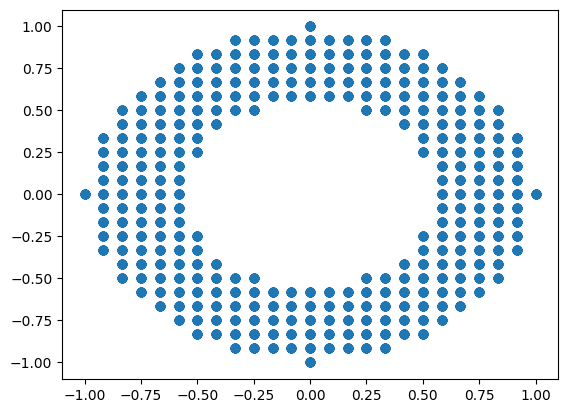

In [4]:
plt.scatter(evaluator.constraint_data_space_grid[:,0],evaluator.constraint_data_space_grid[:,1])

In [9]:
evaluator.metrics["jsd"](evaluator.constraint_data_space_grid[:])

Array(0., dtype=float32)

In [21]:
evaluator.get_metrics(evaluator.constraint_data_space_grid[:]) #,["jsd","ae"]

{'jsd': Array(0., dtype=float32),
 'ae': Array(1.4878331, dtype=float32),
 'mcudsa': Array([0.], dtype=float32),
 'ksfc': Array([370.40802], dtype=float32),
 'cc': Array(0., dtype=float32)}

In [15]:
val_grid=valid_space_grid(constr_function,3,20,-1,1)
jsd=JensenShannonDivergence(grid=val_grid,target_distribution=(jnp.ones(val_grid.shape[0])/(val_grid.shape[0]))[:,None])
evaluator2=Evaluator(constraint_function=constr_function,data_dim=3,points_per_dim=25,customized_metrics={"jsd":jsd})

In [16]:
evaluator2.metrics["jsd"](evaluator.constraint_data_space_grid[:])

Array(0.00326594, dtype=float32)

In [2]:
def build_grid(dim, low, high, points_per_dim):
    """Build a uniform grid of points in the given dimension."""
    xs = [jnp.linspace(low, high, points_per_dim) for _ in range(dim)]

    x_g = jnp.meshgrid(*xs)
    x_g = jnp.stack([_x for _x in x_g], axis=-1)
    x_g = x_g.reshape(-1, dim)

    assert x_g.shape[0] == points_per_dim**dim
    return x_g

In [5]:
build_grid(2,-1,1,20).shape

(400, 2)

In [32]:
@jdc.pytree_dataclass
class Metrics:
    """Dataclass containing the provided metric functions for data evaluation."""
    jsd: int
    ae: Callable

In [34]:
k=Metrics(jsd=jnp.nan,ae=jnp.nan)

In [39]:
getattr(k,"jsd")

nan

In [11]:
k=jnp.array([0,-1,234,0,-3])
k[jnp.where(k!=0)]

Array([ -1, 234,  -3], dtype=int32)

In [2]:
para = [jnp.linspace(-1, 1, 20) for _ in range(2)]
hypercube_grid = jnp.meshgrid(*para)

In [3]:
af=jax.lax.reshape(jnp.array(hypercube_grid), (2,20**2))

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

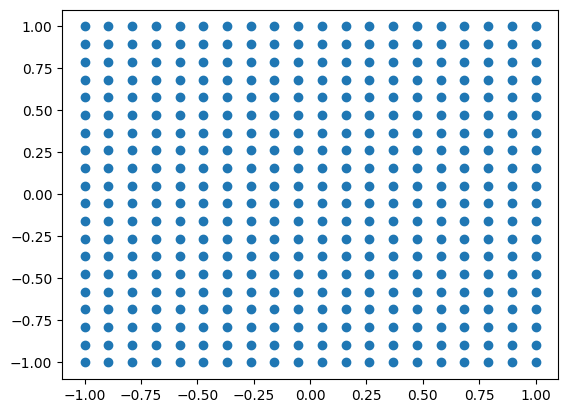

In [5]:
plt.scatter(af[0],af[1])

In [25]:
points=100
para=[jnp.linspace(-1, 1, points) for _ in range(2)]
meshgrid=jnp.meshgrid(*para)


In [26]:
af=jax.lax.reshape(jnp.array(meshgrid), (2,points**2))

In [27]:
def constr_function(data_point):
    return jax.nn.relu((data_point[0]**2+data_point[1]**2)-1)

In [39]:
def valid_space(data_grid,con_func):
    data_vec=jax.lax.reshape(jnp.array(meshgrid), (2,points**2))
    val_space_vec=jax.vmap(con_func,in_axes=1)(data_vec)==0
    return jax.lax.reshape(val_space_vec, (tuple([points]*2)))



In [40]:
val_space=valid_space(meshgrid,constr_function)

In [41]:
val_space

Array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [42]:
val_space2=valid_space(af,constr_function)

In [45]:
val_space2

Array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

[2, 2, 2]

In [10]:
val_space.shape

(100, 100)

In [11]:
val_space[50,50]

Array(True, dtype=bool)

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

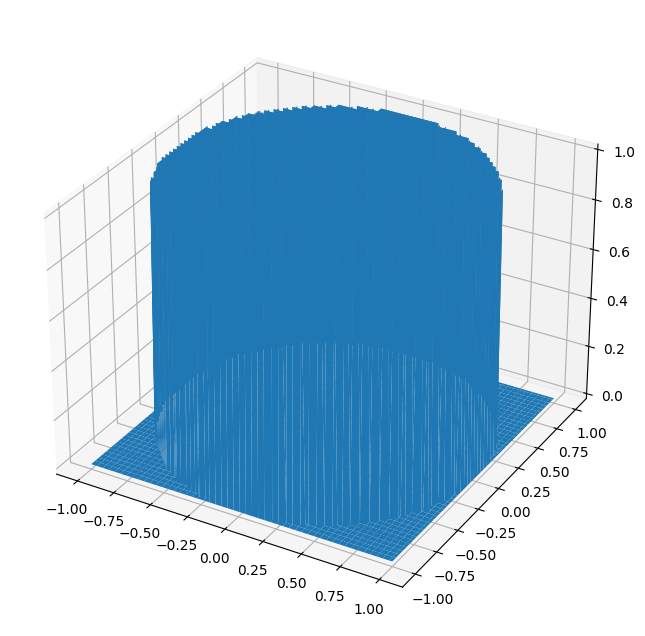

In [46]:

# Plot a sin curve using the x and y axes.
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(meshgrid[0], meshgrid[1],val_space, shade=False)